RED ENTRENADA VGG16



In [17]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import cv2

In [19]:
batch_size = 32
img_height = 48
img_width = 48

data_train = f.curr_path() + os.sep + 'data' + os.sep + "Train" 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_train,
  validation_split=0.25,
  subset="training",
  seed=43,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_train,
  validation_split=0.25,
  subset="validation",
  seed=43,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 39209 files belonging to 43 classes.
Using 29407 files for training.
Found 39209 files belonging to 43 classes.
Using 9802 files for validation.


In [11]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    print(labels_batch[0])
    break

(32, 48, 48, 3)
(32,)
tf.Tensor(18, shape=(), dtype=int32)


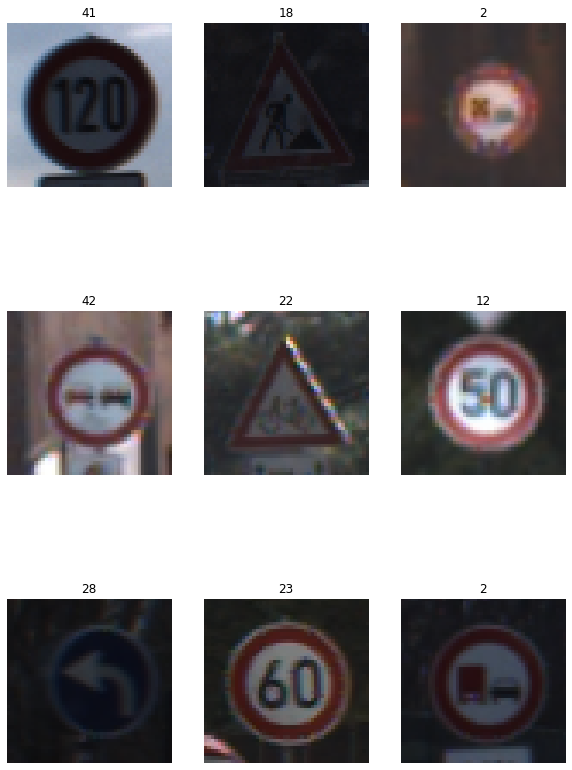

In [20]:
vt.labels_images(train_ds)

In [21]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (img_height, img_width, 3),
                  include_top=False,
                  weights = 'imagenet')

# Estableciendo a False las capas de la red VGG16 
# no entreno las capas ya entrandas previamente en esa red  
for layer in base_model.layers:
    layer.trainable = False
    
##### FULLY CONNECTED LAYER #####
# Flatten the output layer to 1 dimension
x0 = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x1 = layers.Dense(512, activation='relu')(x0)

# Add a dropout rate of 0.5
x2 = layers.Dropout(0.5)(x1)

# Add a final sigmoid layer for classification
x3 = layers.Dense(1, activation='sigmoid')(x2)

# Aquí creamos un modelo concatenando la primera capa
# 'base_model.input' con la última capa 'x3'
model = tf.keras.models.Model(base_model.input, x3)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics = ['acc'])

In [22]:
vgg16_model = create_vgg16()  
vgg16_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse'])  

In [23]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [24]:
vgghist = vgg16_model.fit(train_ds,
                    validation_data = val_ds,
                    epochs = 5,
                    verbose=1)

Epoch 1/5


ValueError: in user code:

    C:\Users\Karina\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py:830 train_function  *
        return step_function(self, iterator)
    C:\Users\Karina\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py:813 run_step  *
        outputs = model.train_step(data)
    C:\Users\Karina\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py:771 train_step  *
        loss = self.compiled_loss(
    C:\Users\Karina\AppData\Roaming\Python\Python37\site-packages\keras\engine\compile_utils.py:201 __call__  *
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Karina\AppData\Roaming\Python\Python37\site-packages\keras\losses.py:142 __call__  *
        losses = call_fn(y_true, y_pred)
    C:\Users\Karina\AppData\Roaming\Python\Python37\site-packages\keras\losses.py:246 call  *
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Karina\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\util\dispatch.py:206 wrapper  **
        return target(*args, **kwargs)
    C:\Users\Karina\AppData\Roaming\Python\Python37\site-packages\keras\losses.py:1631 categorical_crossentropy
        y_true, y_pred, from_logits=from_logits)
    C:\Users\Karina\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Karina\AppData\Roaming\Python\Python37\site-packages\keras\backend.py:4827 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\Karina\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 100) are incompatible


In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                metrics = ['acc'])